In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [29]:
# defining hyperparameters
num_trials = 10_000
bandit_prob = [0.2, 0.5, 0.75]
p0 = 1 # initial high probability

In [30]:
class Bandit:
    '''
    defining the slot machine,
    -p is the win rate
    -has pull method
    -maintains the win rate over time'''
    
    def __init__(self, p, p0=10):
        self.p = p
        self.p_estimate = p0
        self.N = 1  # number of trials. We start with N = 1, else the estimated prob will be erased.
    
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + (1/self.N)*(x - self.p_estimate)
        #print(self.p_estimate)
        
        
def experiment():
    bandits = [Bandit(p, p0) for p in bandit_prob]
    num_optimal = 0
    rewards = np.zeros(num_trials)
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    for i in range(num_trials):
        j = np.argmax([b.p_estimate for b in bandits])  # we select the bandit based on the estimated bandit
        if j == optimal_j:
            num_optimal += 1
        
        # pull the arm for the selcted bandit
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update the selected bandit
        bandits[j].update(x)
    return rewards, num_optimal, bandits

In [31]:
rewards, num_optimal, bandits = experiment()

for b in bandits:
    print("mean estimate", b.p_estimate)

# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / num_trials)
print("num_times_optimal_bandit_selected:", num_optimal)

optimal j: 2
mean estimate 0.5
mean estimate 0.5526315789473684
mean estimate 0.7555979516015655
total reward earned: 7546.0
overall win rate: 0.7546
num_times_optimal_bandit_selected: 9958


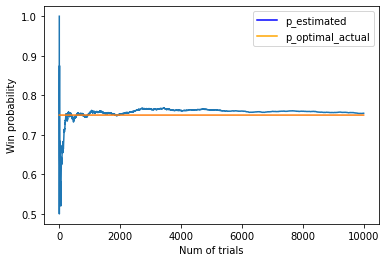

In [32]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(num_trials) + 1)
plt.plot(win_rates)
plt.plot(np.ones(num_trials)*np.max(bandit_prob))
plt.xlabel("Num of trials")
plt.ylabel("Win probability")
blue_line = mlines.Line2D([], [], color='blue', label='p_estimated')
orange_line = mlines.Line2D([], [], color='orange',label='p_optimal_actual')
plt.legend(handles=[blue_line, orange_line])
plt.show();

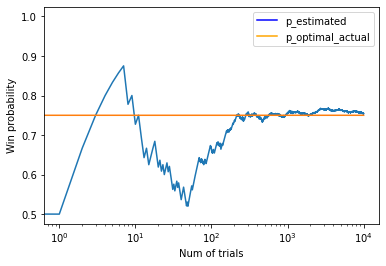

In [33]:
# plot the results on log axis
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(num_trials) + 1)
plt.plot(win_rates)
plt.plot(np.ones(num_trials)*np.max(bandit_prob))
plt.xscale('log')
plt.xlabel("Num of trials")
plt.ylabel("Win probability")
blue_line = mlines.Line2D([], [], color='blue', label='p_estimated')
orange_line = mlines.Line2D([], [], color='orange',label='p_optimal_actual')
plt.legend(handles=[blue_line, orange_line])
plt.show();